# Modellierung

In [1]:
%pylab inline

from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set default values for plotting:
rcParams['axes.titlesize']  = 14
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 12
rcParams['lines.linewidth'] = 2

## Methodik

Die Kombination physikalischer Gesetze, die neben den aktuellen Größen auch deren zeitliche Änderungen enthalten, führen zu gewöhnlichen Differentialgleichungen (GDGL).

## Beispiele

### Beispiele aus der [LV Angewandte Mathematik](https://energie.labs.fhv.at/~kr/am/)

- Newtonsche Bewegungsgleichung der gedämpften Schwingung: lineare, inhomogene, GDGL 2. Ordnung
- Newtonsches Abkühlungsgesetz: lineare, inhomogene GDGL 1. Ordnung
- Seeverschmutzung: lineare, inhomogene GDGL 1. Ordnung
- Menge an CO$_2$ in einem Raum: lineare, inhomogene GDGL 1. Ordnung
- Linearer Luftwiderstand: lineare, inhomogene GDGL 1. Ordnung
- Quadratischer Luftwiderstand: nicht-lineare, homogene GDGL 1. Ordnung
- RL-Glied: lineare, inhomogene GDGL 1. Ordnung
- Radioaktiver Zerfall: System von 2 linearen, homogenen GDGL 1. Ordnung
- Elektrischer Schaltkreis mit zwei R- und zwei L-Bauteilen: System von 2 linearen, inhomogenen GDGL 1. Ordnung
- etc.

### Beispiel RC-Glied

$RC\dot{u}_a + u_a = u_e$ ... lineare, inhomogene GDGL 1. Ordnung

- Literatur: z. B. [Philippsen, p. 51f.]

In [ ]:
R = 2
C = 3

t = linspace(0, 25, 100)
u_a = 1 - exp(-t/(R*C))
u_a_steady_state = ones_like(t)

figure(figsize=(7,4))
plot(t, u_a, label='$u_a(t)$')
plot(t, u_a_steady_state, '--', label='steady state')
legend(loc='best')
xlabel('Zeit')
ylabel('Spannung')
grid(True)

### Beispiel Wasserstand

$A\dot{h} = q_z - a\sqrt{2gh}$ ... nicht-lineare inhomogene GDGL 1. Ordnung

- Literatur: [Haager, p. 42, 81]
- numerische Lösung:

In [ ]:
A = 10
a = 0.5
g = 10

t = linspace(0, 25, 100)
h0 = 10
qz = 0

def my_fun(h, t):
    hp = 1/A*qz - a/A*sqrt(2*g)*sqrt(h)
    return hp

h = odeint(my_fun, h0, t)

figure(figsize=(7,4))
plot(t, h)
ylim(-1, 20)
xlabel('Zeit t')
ylabel('Höhe h')
grid(True)

### Beispiel Radaufhängung mit Radmasse

$m\ddot{x}_a + r\dot{x}_a + c x_a = x_e$ ... lineare, inhomogene GDGL 2. Ordnung

Literatur: [Philippsen, p. 76ff.]

### RLC-Glied

$LC\ddot{u}_a + RC\dot{u}_a + u_a = u_e$ ... lineare, inhomogene GDGL 2. Ordnung

- Literatur: z. B. [Philippsen, p. 49.]
- numerische Lösung:

In [ ]:
R = .5
L = 2
C = 1

t = linspace(0, 50, 1000)
y0 = array([0, 0])

A = array([[       0,    1],
           [-1/(L*C), -R/L]])
b = array([0, 1/(L*C)])

def my_fun(y, t):
    u_e = sin(2*t)
    yp = dot(A, y) + b*u_e
    return yp

y = odeint(my_fun, y0, t)
u_a = y[:,0]
u_e = sin(2*t)

figure(figsize=(7,4))
plot(t, u_a, linewidth=2, label='$u_a$')
plot(t, u_e, linewidth=1, label='$u_e$')
xlabel('$t$')
ylabel('$u_a$, $u_e$')
legend()
grid(True)

## Aufgaben

### Aufgabe 1: Wasserstand mit Regelung

Betrachten Sie nochmals das Wasserstand-Beispiel $A\dot{h} = q_z - a\sqrt{2gh}$.

1. Ergänzen Sie das Modell um eine Regelung, indem Sie die Zuflussmenge mit einer Schieber-Rückkopplung auf Grundlage des Wasserstands beeinflussen.
2. Simulieren Sie das Verhalten des Modells, indem Sie die GDGL am Computer mittels `odeint` lösen.

**Lösung:**

In [ ]:
h_opt = 5

def my_qz(h, h_opt):
    h_diff = h - h_opt
    if h_diff <= -2:
        qz = 8
    elif h_diff <= 2:
        qz = 4 - 2*h_diff
    else:
        qz = 0
    return qz

h = linspace(0, 10, num=100)
qz = zeros_like(h)
for k in range(len(h)):
    qz[k] = my_qz(h[k], h_opt)
    
figure(figsize=(7,4))
plot(h, qz, label='qz')
xlabel('h')
ylabel('qz')
vlines(h_opt, ylim()[0], ylim()[1], linestyle = '--', label='h_opt')
legend(loc='best')
grid(True)

In [ ]:
A = 10
a = .5
g = 10

t = linspace(0, 100, 100)
h0 = 10

def my_fun(h, t):
    hp = -a/A*sqrt(2*g)*sqrt(h) + 1/A*my_qz(h, h_opt)
    return hp

h = odeint(my_fun, h0, t)

figure(figsize=(7,4))
plot(t, h, label= 'h')
hlines(h_opt, min(t), max(t), color='r', linestyle='--', label='h_opt')
ylim(0, 1.3*max(h))
xlabel('Zeit t')
ylabel('Höhe h')
legend(loc='best')
grid(True)

### Aufgabe 2: konischer Wassertank mit Verdunstung

Ein konischer Tank hat die Form eines Kegels mit Spitze nach unten. Er ist 12 Meter hoch. Seine obere kreisförmige Fläche ist offen und hat einen Radius von 12 Metern. Wasser fließt von oben mit einer Rate von $\pi$ m$^3$/h in den anfangs fast leeren Tank mit Wasserhöhe 1 Meter. An der Wasseroberfläche verdunstet Wasser mit einer Rate, die proportional zur Wasseroberfläche ist. Der Proportionalitätsfaktor ist 0.01.

1. Bestimmen Sie die GDGL, die das Wasservolumen $V(t)$ in m$^3$ im Tank zur Zeit $t$ in Stunden nach Beginn und in Abhängigkeit der Wasserhöhe $h(t)$ in m beschreibt.
2. Bestimmen Sie die GDGL, die die Wasserhöhe $h(t)$ im Tank beschreibt.
3. Wird der Tank jemals voll? Falls ja, begründen Sie Ihre Antwort. Falls nein, bestimmen Sie die maximale Wasserhöhe.
4. Simulieren Sie das Verhalten des Wassertanks, indem Sie die GDGL am Computer mittels `odeint` lösen.

*Quelle:* Farlow: An Introduction to Differential Equations and their Applications. Sec. 2.6., Problem 28, p. 89.

**Lösung:**

1. $\dot{V} = \pi - 0.01 \pi h^2$
2. $h^2\dot{h} = 1 - 0.01 h^2$
3. $\dot{h} =0 \Rightarrow h_{\text{max}} = \sqrt{100} =10$
4. Siehe Code

In [ ]:
t = linspace(0, 2000, 100)
h0 = 1

def my_fun(h, t):
    hp = 1/h**2 - 1/100
    return hp

h = odeint(my_fun, h0, t)

figure(figsize=(7,4))
plot(t, h, label= 'h')
hlines(10, min(t), max(t), color='r', linestyle='--', label='h_opt')
ylim(0, 11)
xlabel('Zeit t')
ylabel('Höhe h')
legend(loc='best')
grid(True)

### Aufgabe 3: Messsonde im Ozean

Von einem Schiff auf hohem Ozean wird eine Messsonde ins Wasser gelassen. Die Sonde beginnt ihren Sinkvorgang beim Eintauchen ins Wasser aus dem Ruhezustand heraus. Auf den Körper wirken die Gravitationskraft und die Reibungskraft, die vom Wasser auf die Sonde ausgeübt wird. Diese soll proportional zur Sinkgeschwindigkeit angenommen werden. Gesucht ist die GDGL, die die Sinkgeschwindigkeit der Sonde als Funktion der Zeit beschreibt. Erläutern Sie Ihr Ergebnis nachvollziehbar.

*Quelle:* Sanal: Mathematik fuer Ingenieure. 3. Auflage, 9.11.3., S. 497 f.

**Lösung:** $m\dot{v}(t) = mg - kv(t)$

### Aufgabe 4: Kette rutscht vom Tisch

Eine Kette der Länge $L$ rutscht von einem reibungsfreien Tisch. Welche GDGL beschreibt die Länge $x(t)$ des vom Tisch hängenden Kettenteils als Funktion der Zeit $t$? Erläutern Sie Ihr Ergebnis nachvollziehbar.

*Quelle:* MacCluer: Industrial Mathematics. Problem 9.17, p. 143.

**Lösung:** $\ddot{x}(t)=g\frac{x(t)}{L}$

### Aufgabe 5: Schwingung

Eine Masse von 10 kg ist an eine Feder angehängt und streckt diese um 0,7 m. Aus dieser Ruhelage wird die Masse mit der Anfangsgeschwindigkeit 1 m/s in Aufwärtsrichtung in Bewegung versetzt. $x(t)$ bezeichne die Auslenkung der Massse in m aus der Ruhelange nach unten (in Richtung Erde) $t$ Sekunden nach dem Start der Bewegung. Der geschwindigkeitsabhängige Reibungswiderstand beträgt -90 $\dot{x}(t)$ N.

1. Zeigen Sie, dass $x(t)$ die GDGL $\ddot{x} + 9\dot{x} + 14x = 0$ erfüllt.
2. Geben Sie die Anfangsbedingungen an und lösen Sie das Anfangswertproblem, d. h. bestimmen Sie $x(t)$.
3. Welchen Wert nimmt $x(t)$ für $t\rightarrow \infty$ an? Begründen Sie Ihre Antwort.

*Hinweis:* Verwenden Sie für die Erdbeschleunigung den Wert 9,8 m/s$^2$.

*Quelle:* Bronson: Differential Equations. 4. Auflage, 2014, p. 120, Problem 14.5

**Lösung:** Die Lösungen der charakteristische Gleichung sind $\lambda_1=-2$ und $\lambda_2=-7$. $x(t) = \frac{1}{5}(e^{-7t} - e^{-2t})\rightarrow 0$ für $t\rightarrow \infty$.

In [ ]:
g = 9.8 # m/s^2
m = 10  # kg
w = m*g # Schwerkraft
l = 0.7 # m Gleichgewichtsauslenkung
k = w/l # Federkonstante

print("w=", w)
print("k=", k)

print("l1=", -4.5 + sqrt(4.5**2 - 14))
print("l2=", -4.5 - sqrt(4.5**2 - 14))

### Aufgabe 6: Beschleunigung eines Fahrzeugs

1. Stellen Sie die Bewegungsgleichung für ein Fahrzeug unter Berücksichtigung folgenden Bedingungen auf:

    - 1-dimensionale ebene Bewegungsrichtung
    - Lufwiderstandskraft proportional zur Geschwindigkeit zum Quadrat und proportional zur Referenzfläche
    - Rollwiderstand proportional zur Normalkraft
    - Antriebskraft $F_A$

2. Klassifizieren Sie die resultierende DGL:

    - Ordnung?
    - (nicht) linear?
    - (in)homogen?

**Lösung:**

1. $m\ddot{x} = F_A - c_R mg - c_L \dot{x}^2$
2. Ordnung = 2, nichtlinear, inhomogen    

### Aufgabe 7: System gekoppelter GDGL

Das folgende System gekoppelter GDGL bescheibt die Anzahl $H(t)$ von Hasen und die Anzahl $F(t)$ von Füchsen im Verlauf der Zeit $t$ gemessen in Monaten.

$$
\begin{align}
\dot{H} &=  2H - 3HF \\
\dot{F} &= -4F + 5HF
\end{align}
$$

Interpretieren Sie das Modell.

*Quelle:* Bronson: Differential Equations. 4. Auflage, 2014, p. 12, Problem 2.11

**Lösung:** Räuber-Beute-Gleichungen: Die $HF$-Terme beschreiben die Wechselwirkungen (Reduktion der Hasenpopulation, Anwachsen der Fuchspopulation). Ohne Wechselwirkungen würde die Anzahl der Hasen exponentiell anwachsen und jene der Füchse exponentiell schrumpfen.

### Aufgabe 8: Fallschirmspringer - quadratischer Luftwiderstand

Ein Fallschirmspringer mit Masse 80 kg springt mit sofort geöffnetem Fallschirm aus einer Höhe $h_0 = 2500$ m ohne anfängliche Steig- oder Sinkgeschwindigkeit. Die Luftwiderstandskraft ist proportional zum Quadrat seiner Geschwindigkeit. 

1. Bestimmen Sie die GDGL inkl. Anfangsbedingungen für seine vertikale Bewegung.
2. Welchen Wert muss die Proportionalitätskonstante der Luftwiderstandskraft haben, sodass die maximale Sinkgeschwindigkeit 4 m/s beträgt.

*Quellen:* Scherf: Modellbildung und Simulation dynamischer Systeme. S. 9f. und [de.wikipedia.org/wiki/Fallschirmspringen](https://de.wikipedia.org/wiki/Fallschirmspringen)

**Lösung:**

1. $m\ddot{h}(t) = -mg + k\dot{h}^2(t), h(0)=2500, \dot{h}(0)=0$

In [10]:
m = 80
g = 9.81
v = 4
print("v = {:} km/h".format(v*3.6) )

k = m*g/v**2
print("k =", k)

v = 14.4 km/h
k = 49.050000000000004


### Aufgabe 9: Boje

Eine zylindrische Boje mit einem Durchmesser von 50 cm und einer vertikalen Achse schwimmt im Wasser. Wenn man sie einmal leicht runterdrückt, schwingt sie mit einer Periode von 2.7 Sekunden.

1. Verwenden Sie das Archimedische Prinzip, um die GDGL der vertikalen Schwingung zu bestimmen.
2. Bestimmen Sie anschließend die Masse der Boje.

*Quelle:* Farlow: An Introduction to Differential Equations and Their Applications. §3.9 Problem 20 p. 172

**Lösung:**

Die Newtonsche Bewegungsgleichung für die Eintauchtiefe $x$ der Boje lautet $m\ddot{x} = mg - Ax\rho g$ mit $A$ der Grundfläche der Boje, $\rho$ der Dichte des Wassers und $g$ der Erdbeschleunigung. Sie ergibt umgeformt $\ddot{x} + \frac{A\rho g}{m}x=g$. Die Boje schwingt daher mit der Kreisfrequenz $\omega = \frac{2\pi}{T} = \sqrt{\frac{A\rho g}{m}}$, woraus sich $m$ berechnen lässt:

In [3]:
d   = 0.5    # Durchmesser, m
rho = 1000   # Dichte von Wasser, kg/m^3
g   = 9.81   # Erdbeschleunigung, m/s^2
T   = 2.7    # Schwingungsdauer, Periode, s

r = d/2 # Radius
A = pi*r**2 # Grundfläche
m = (A*rho*g*T**2)/((2*pi)**2)
print("Masse der Boje = {:.2f} kg".format(m))

Masse der Boje = 355.69 kg


### Aufgabe 10: Romeo und Julia

Ein bisschen weit hergeholt könnte das System von zwei Differentialgleichungen 

\begin{align}
\frac{\text{d}r}{\text{d}t}(t) & = -aj(t), \quad (a>0) \\
\frac{\text{d}j}{\text{d}t}(t) & =  br(t), \quad (b>0)
\end{align}

die Zuneigung zweier Liebender, Romeo und Julia, darstellen, wobei die Werte $r(t)$ und $j(t)$ ihre jeweilige Liebe für den anderen zum Zeitpunkt $t$ messen. Man beachte, dass Romeo, je mehr Julia ihn liebt, anfängt, sie nicht mehr zu mögen, aber wenn sie das Interesse verliert, erwärmen sich seine Gefühle für sie. Sie hingegen macht die gegenteilige Erfahrung. Ihre Liebe zu ihm wächst, wenn er sie liebt, und verwandelt sich in Hass, wenn er sie hasst. 

1. Wie, glauben Sie, würde unter diesen Bedingungen die Lösung dieses Gleichungssystems aussehen? Beschreiben Sie Ihre Meinung in Worten.
3. Skizziern Sie das das Vektorfeld des GDGL-Systems, vgl. [LV Angewandte Mathematik: Systeme von GDGL](https://energie.labs.fhv.at/~kr/etw-am/14_systeme_GDGL_vl.html).
3. Lösen Sie das System, indem Sie jeweils eine GDGL zweiter Ordnung für $r(t)$ und $j(t)$ aus dem System ableiten und lösen.

Die oben beschriebene Beziehung zwischen Romeo und Julia ist zu einer Beziehung gereift, die durch das lineare System 

\begin{align}
\frac{\text{d}r}{\text{d}t}(t) & = a_{11}r(t) + a_{12}j(t) \\
\frac{\text{d}j}{\text{d}t}(t) & = a_{21}r(t) + a_{22}j(t)
\end{align}

modelliert wird, in dem die "Liebe/Hass" Parameter $a_{ij}$ positiv oder negativ sein können. Beachten Sie, dass, wenn wir $a_{11} > 0$ und $a_{12} > 0$ haben, Romeos Liebe zu Julia durch seine eigenen Gefühle und Julias Liebe zu ihm angespornt wird. In diesem Fall könnten wir Romeo als "Streberliebhaber" bezeichnen. Beschreiben in den Teilen (a)-(c) grob die anderen drei Liebhabertypen:
(a) $a_{11} > 0$, $a_{12} < 0$,
(b) $a_{11} < 0$, $a_{12} > 0$,
(c) $a_{11} < 0$, $a_{12} < 0$.

*Quelle:* Farlow: An Introduction to Differential Equations and Their Applications. §6.1 Problems 24 and 25, p. 323

**Lösung:**

 Lösung dieses Gleichungssystems: 
 
 - Je mehr Romeo Julia liebt, desto mehr liebt Julia Romeo.
 - Je mehr Julia Romeo liebt, desto weniger liebt Romeo Julia.
 
 zwei phasenverschobene Schwingungen

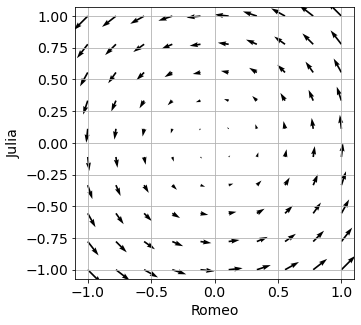

In [4]:
a = 1
b = 1

r = linspace(-1, 1, 10)
j = linspace(-1, 1, 10)
R, J = meshgrid(r, j)

figure(figsize = (5,5))
quiver(R, J, -a*J, b*R, scale=20)
axis('equal')
xlabel('Romeo')
ylabel('Julia')
grid(True)

Einsetzen liefert

$$\begin{align}
\ddot{r}(t) &= ab r(t) \\
\ddot{j}(t) &= ab j(t)
\end{align}$$

mit Lösungen 
$r(t) = R_1 \cos(\sqrt{ab}t) + R_2 \sin(\sqrt{ab}t)$ und 
$j(t) = J_1 \cos(\sqrt{ab}t) + J_2 \sin(\sqrt{ab}t)$.

(a) Romeo wird durch Julias Annäherungsversuche ($a_{12} < 0$) abgeturnet, aber immer noch von seinen eigenen Gefühlen ($a_{11} > 0$) angespornt. Er ist der "besondere Liebhaber". 

(b) Romeo ist von Julias Liebe erregt ($a_{12} > 0$), aber er hat Angst vor seinen eigenen Gefühlen ($a_{11} < 0$). Er ist der "unsichere Liebhaber". 

(c) Romeo ist von Julias Annäherungsversuchen abgeschreckt ($a_{12} < 0$) und hat Angst vor der Liebe ($a_{11} < 0$). Er ist der "Ingenieur".

### Aufabge 11: SIR-Modell zu COVID-19

Die pdf-Datei `SIR.pdf` ist ein Ausschnitt aus einer Mitschrift im Kurs [Mathematical Ecology](https://ufind.univie.ac.at/de/course.html?lv=250049&semester=2020S) an der Universität Wien. Lesen Sie die gut drei Seiten, auch wenn Sie evtl. nicht alle mathematischen Argumente verstehen.

Wir verwenden Tage als Zeiteinheit und folgende Parameterwerte: $N=1000$, $c=\frac{1}{8}$ und $r=\frac{1}{14}$.

1. Verwenden Sie den Befehl [`odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), den Sie mit `from scipy.integrate import odeint` importieren können, um das System an GDGL numerisch über ein Jahr zu lösen.
2. Stellen Sie die Lösungen $S(t), I(t), R(t)$ in einer Grafik über der Zeitachse $t$ dar.
3. Bestimmen Sie die "basic reproductive ratio (basic reproduction number)" $\cal{R}_0$. Überprüfen Sie die im pdf angegebenen Formeln für $I_{\text{max}}$ und $S_\infty$ an Ihrer Lösung.

4. Stellen Sie in der $S$-$I$-Ebene das Vektorfeld der ersten beiden Gleichungen des GDGL-Systems und die $(S,I)$-Lösung in einer gemeinsamen Grafik dar, vgl. [LV Angewandte Mathematik: Systeme von GDGL](https://energie.labs.fhv.at/~kr/etw-am/14_systeme_GDGL_vl.html)

*Literatur und Links:*

- [Über Modelle, Prognosen und die Realität von Covid-19](https://www.falter.at/zeitung/20200429/ueber-modelle-prognosen-und-die-realitaet-von-covid-19)
- [Executive Summary Covid19 v2.pdf](https://t.co/xhvr32GRR1)
- [The Mathematics and BioSciences Group](https://www.mabs.at/) der Universität Wien

**Lösung:**

In [5]:
# parameters:

# population size:
N = 1000

# average number of “transmission-allowing” contacts per individual
# and per time unit:
c = 1/8   
# c = 1/13

# recovery rate: the rate at which previously infectious individuals become 
# non-infectious (which may also be because they are completely quarantined 
# or because they die):
r = 1/14  

# basic reproductive ratio (also: basic reproduction number )
R0 = c/r
print("R0 = {:.2f}".format(R0))

# initial conditions:
I_0 = 1
S_0 = N - I_0
R_0 = 0

R0 = 1.75


In [6]:
# derivative function
def my_deriv(y, t):
    [S, I, R] = y
    Sp = -c/N*S*I
    Ip =  c/N*S*I -r*I
    Rp =           r*I
    yp = [Sp, Ip, Rp]
    return yp   # y' ... y prime

# sequence of time points for which to solve for y. The 
# initial value point should be the first element of this sequence.
t = arange(start=0, stop=365*1, step=1)  # unit = days

# The initial value:
y_0 = [S_0, I_0, R_0]

# Solve numerically with odeint:
y_sol = odeint(my_deriv, y_0, t)

In [7]:
I_max = N*(1 - (1 - log(N/(S_0*R0)))/R0)
print(f"I_max = {I_max:.2f}.")

S_inf = N*(1 - 2*(R0 - 1)/R0**2)
print(f"S_inf = {S_inf:.2f}.")

I_max = 109.36.
S_inf = 510.20.


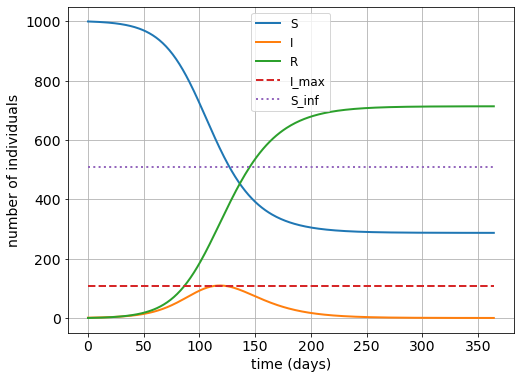

In [8]:
figure(figsize=(8,6))
my_pl = plot(t, y_sol)
my_Im = plot(t, I_max*ones_like(t), '--')
my_Si = plot(t, S_inf*ones_like(t), ':')
legend(my_pl + my_Im + my_Si, ['S', 'I', 'R', 'I_max', 'S_inf'])
xlabel('time (days)')
ylabel('number of individuals')
grid(True)

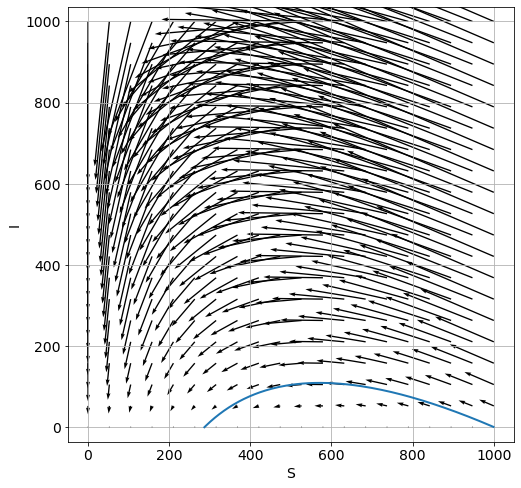

In [9]:
S_vec = linspace(start=0, stop=N, num= 20)
I_vec = linspace(start=0, stop=N, num= 20)
S_grid, I_grid = meshgrid(S_vec, I_vec)

figure(figsize=(8,8))
quiver(S_grid, I_grid, 
       -c/N*S_grid*I_grid, 
       c/N*S_grid*I_grid -r*I_grid, scale=200) # smaller scale makes the arrow longer
plot(y_sol[:,0], y_sol[:,1])
axis('equal')
xlabel('S')
ylabel('I')
grid(True)

### Aufgabe 12: Fallschirmspringer - linearer Luftwiderstand

Ein Fallschirmspringer mit Masse 80 kg springt mit sofort geöffnetem Fallschirm aus einer Höhe $h_0=2500$ m ohne anfängliche Steig- oder Sinkgeschwindigkeit. Die Luftwiderstandskraft sei proportional zu seiner Geschwindigkeit. 

1. Bestimmen Sie die GDGL inkl. Anfangsbedingungen für seine vertikale Bewegung $h(t)$. Klassifizieren Sie die GDGL.
2. Welchen Wert muss die Proportionalitätskonstante der Luftwiderstandskraft haben, sodass die maximale Sinkgeschwindigkeit 4 m/s beträgt.

*Quellen:* Scherf: Modellbildung und Simulation dynamischer Systeme. S. 9 f. und [de.wikipedia.org/wiki/Fallschirmspringen](https://de.wikipedia.org/wiki/Fallschirmspringen)

**Lösung:**

1. $m\ddot{h} = -mg - k\dot{h}, h(0)=2500, \dot{h}(0)=0$, linear, 2. Ordnung, inhomogen, konstante Koeffizienten
2. Setze $m\ddot{h} = 0$ => $k = -\frac{mg}{v_{\text{max}}}$ = 196.2

In [1]:
m = 80    # kg
g = 9.81  # m/s^2
v = -4    # m/s
k = -m*g/v
print("k=", k)
print("v= {:} km/h".format(v*3.6) )

k= 196.20000000000002
v= -14.4 km/h


### Aufgabe 13: Sanfte Landung auf dem Mond

Sie befinden sich mit Ihrer Raumkapsel 30 Meter über der Mondoberfläche, auf der Sie sanft landen möchten.
Ihre aktuelle Geschwindigkeit beträgt 1.03 Meter pro Sekunde senkrecht auf und in Richtung zur Mondoberfläche. 
Die Gravitationsbeschleunigung nahe der Mondoberfläche beträgt 1.62 m/s$^2$.
Ihr Raumkapsel hat ohne Treibstoff eine Masse von 4000 kg, der noch vorhandene Treibstoff hat eine Masse von 2000 kg. Für eine konstante Rückstoßkraft von 500 N verbrauchen Sie pro Sekunde 1 kg Treibstoff, für 1000 N sind es 2 kg/s etc.. Ihr Antrieb ist bis zur Landung so eingestellt, dass er eine konstante Rückstoßkraft von 9423 N erzeugt. 

1. Modellieren Sie die Bewegung und den Verlauf der Gesamtmasse der Raumkapsel. Klassifizieren Sie das Modell.
2. Verifizieren Sie numerisch, dass Sie mit den obigen Angaben sanft landen. 
3. Erstellen Sie alle für die Landung relevanten Plots.
4. Wie lange dauert die Landung? Wieviel Treibstoff wurde für die Landung verwendet? 
5. Wie würden Sie den Antrieb zur Landung einstellen, um weniger Treibstoff zu verbrauchen?

*Hinweis:* Falls Sie zuerst üben wollen: [http://moonlander.seb.ly](http://moonlander.seb.ly/).

**Lösung:**

GDGL-System:

$$\begin{align}
\dot{h} &= v \\
\dot{v} &= -\gamma + \frac{u}{m} \\
\dot{m} &= -ku 
\end{align}$$

Anfangsbedingungen:

$$\begin{align}
h(0) &= h_0 \\
v(0) &= v_0 \\
m(0) &= m_0 + F_0
\end{align}$$

Nebenbedingungen:

$$\begin{align}
0   &\leq u \leq 10000 \\
m_0 &\leq m
\end{align}$$

0.041887764670699434


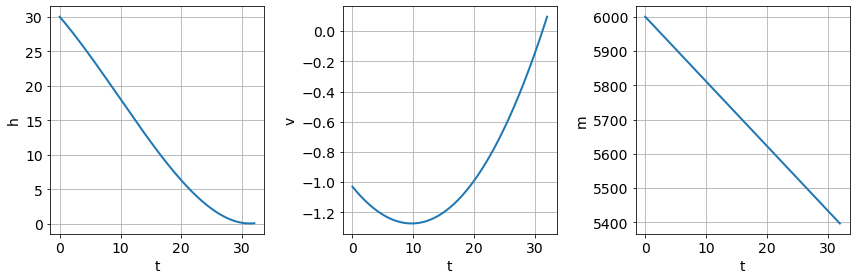

In [11]:
gam = 1.62  # m/s^2, gravitational acceleration on the moon in 

m0 = 4000 # kg
F0 = 2000 # kg

h0 = 30     # m
v0 = -1.03  # m/s

t  = linspace(0, 32, 200)
y0 = array([h0, v0, m0 + F0])

def my_fun(y, t):
    
    k = 0.002
    u = 9423*ones_like(t)
    
    h = y[0]
    v = y[1]
    m = y[2]
    
    hp = v
    vp = -gam + u/m
    mp = -k*u
    
    yp = array([hp, vp, mp])
    return yp

y = odeint(my_fun, y0, t)
h = y[:,0]
v = y[:,1]
m = y[:,2]

figure(figsize=(12,4))
subplot(1,3,1)
plot(t, h, '-'); xlabel('t'); ylabel('h'); grid(True)
subplot(1,3,2)
plot(t, v, '-'); xlabel('t'); ylabel('v'); grid(True)
subplot(1,3,3)
plot(t, m, '-'); xlabel('t'); ylabel('m'); grid(True)
tight_layout()

print(min(h))

## Pendelbewegung

Ein Pendel der Länge $l=1$ Meter schwingt ohne Luftreibung. Die Masse der Stange wird ebenfalls vernachlässigt.
Zum Zeitpunkt $t=0$ ist das Pendel in Ruhe, und die Auslenkung beträgt $\varphi(0)=\frac{\pi}{4}$.

1. Zeigen Sie, dass die GDGL für den Auslenkungswinkel $\varphi(t)$ in Radian in Anhängigkeit der Zeit $t$ in Sekunden $\ddot{\varphi}(t) = -\frac{g}{l}\sin(\varphi(t))$ lautet.
2. Unter welchen Bedingungen ist die Approximation $\sin(\varphi) \simeq \varphi$ gerechtfertigt?
3. Geben Sie Lösung der approximierten GDG für die gegebenen Anfangsbedingungen als Formel an, und plotten Sie diese für Zeiten $0\leq t \leq 10$.
4. Lösen Sie die approximierte und die nicht approximierte GDGL numerisch jeweils mit der Euler- und der Heun-Methode.
5. Beschreiben Sie den Vergleich aller fünf Ergebnisse in Plots und in Worten.

**Lösung:**

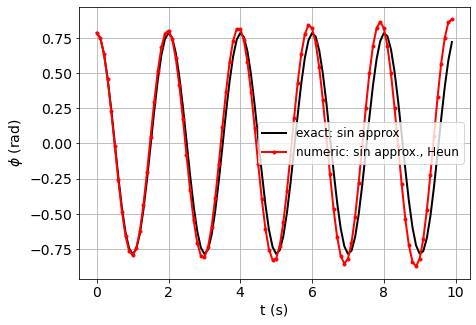

In [12]:
# Parameter:
g = 9.81 # Erdbeschleunigung in m/s^2
l = 1    # Länge in m

# Anfangsbedingungen:
t_0     = 0    # Anfangszeitpunkt in s
phi_0   = pi/4 # Anfangsauslenkung in radian
phi_p_0 = 0    # Anfangswinkelgeschwindigkeit in radian/s

# Zeitschritte:
T = 10    # Löse von Zeit 0 bis T
N = 100  # Anzahl Schritte
h = T/N   # Schrittweite

# Konfiguration:
case = 'sin approx.'
#case = 'no sin approx.'
algo = 'Euler'
algo = 'Heun'

# Zeiten:
t = zeros(N)
t[0] = t_0

# Zustandsvektoren:
s = zeros((2, N))    # matrix of state vectors for all times
s[:,[0]] = array([[phi_0  ], 
                  [phi_p_0]])

# Vektorfeld:
def vf(s, case):
    if case == 'sin approx.':
        phi_p  = s[1,0]
        phi_pp = -g/l*s[0,0]
    elif case == 'no sin approx.':
        phi_p  = s[1,0]
        phi_pp = -g/l*sin(s[0,0])
    return array([[phi_p], 
                  [phi_pp]])

for n in arange(N-1):
    if algo == 'Euler':
        s[:,[n+1]] = s[:, [n]] + h*vf(s[:,[n]], case)
    elif algo == 'Heun':
        k = vf(s[:,[n]], case)
        m = vf(s[:,[n]] + h*k, case)
        s[:, [n+1]] = s[:, [n]] + h*(k + m)/2
    t[n+1] = t[n] + h

phi_num = s[0,:]

w0 = sqrt(g/l)
phi_exact = phi_0*cos(w0*t)

figure(figsize=(7,5))
plot(t, phi_exact, '-k', label='exact: sin approx')
plot(t, phi_num,  '.-r', label='numeric: {:}, {:}'.format(case, algo))
legend(loc='best')
xlabel('t (s)')
ylabel('$\phi$ (rad)')
grid(True)